# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-3-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


# QUESTION 1: 

## Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

In [6]:
LGA_sports = sa_vouchers.loc[:, ['Participant_LGA', 'Voucher_Sport']]
LGA_sports_unique = sa_vouchers.loc[:, ['Participant_LGA', 'Voucher_Sport']]
LGA_sports_count = sa_vouchers.loc[:, ['Participant_LGA', 'Voucher_Sport']]

In [7]:
LGA_sports_unique = LGA_sports_unique.groupby('Participant_LGA')['Voucher_Sport'].nunique()
LGA_sports_count = LGA_sports_count.groupby('Participant_LGA')['Voucher_Sport'].count()

<AxesSubplot:xlabel='Participant_LGA'>

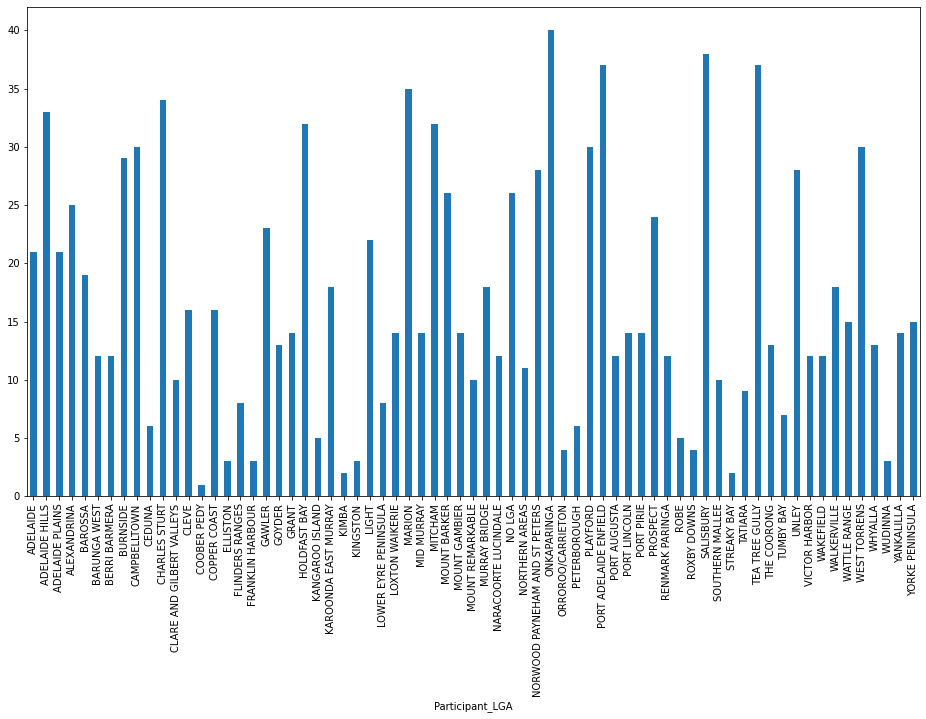

In [8]:
plt.figure(figsize=(16,9))
LGA_sports_unique.plot(kind = 'bar', x = 'Participant_LGA', y = 'Voucher_Sport')

# INTERPRETATION: 

The chart above highlights the distribution of sport (distinct) across participating LGA's. The graph indicates that **ONKAPARINGA, PORT ADELAIDE ENFIELD** and **SALISBURY** are the LGA's that participated the most in different sports.

In contrast, the graph highlights how LGA's such as **COOPER PEEDY, KIMBA** and **STREAKY BAY** had the lowest participation in the voucher program.

<AxesSubplot:xlabel='Participant_LGA'>

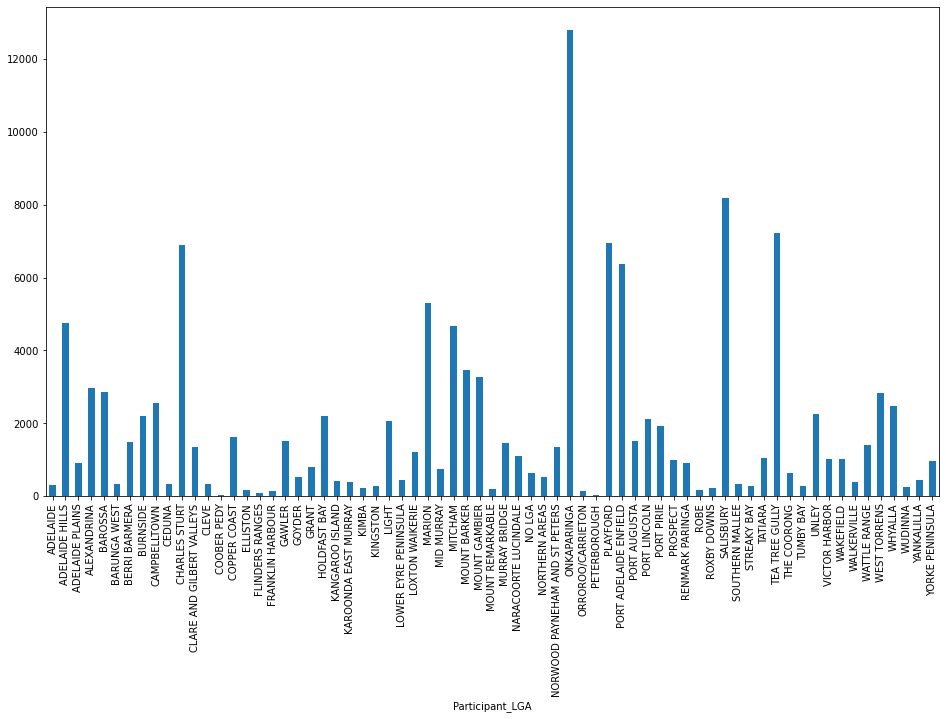

In [9]:
plt.figure(figsize=(16,9))
LGA_sports_count.plot(kind = 'bar', x = 'Participant_LGA', y = 'Voucher_Sport')

# INTERPRETATION: 

The above bar chart examines the distribution of sport (collective) across participating LGA's. This chart shows a local maximum of 12782 which belongs to **ONKAPARINGA**. While this chart roughly follows the same distribution as the first bar chart, there is a clear gap between Onkapargina and other leading LGA's such as **PORT ADELAIDE ENFIELD** and **SALISBURY**.

In [10]:
LGA_sports = sa_vouchers_scores.groupby(['Voucher_Sport']).agg({'Voucher_Sport': ['count']})
LGA_sports.columns = ['Count']
LGA_sports = LGA_sports.reset_index()

<AxesSubplot:xlabel='Voucher_Sport'>

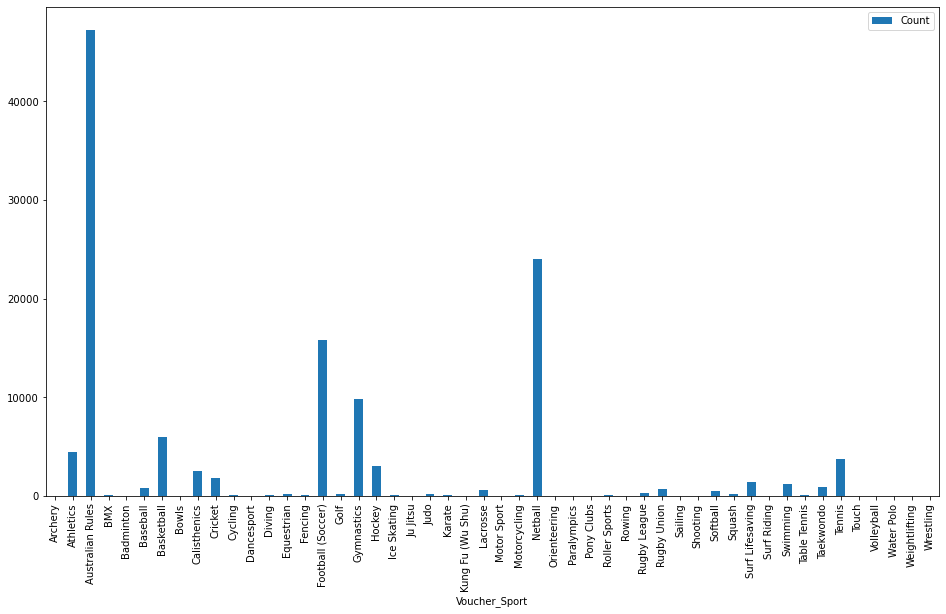

In [11]:
LGA_sports.plot(kind = 'bar', x = 'Voucher_Sport', y = 'Count', figsize = (16,9))

# INTERPRETATION

The voucher sports graph above highlights which sport was more popular in the SA program. Here it is clear to see that **Australian Rules** is the leading sport with a maximum count of 47224, followed by **Netball** as a distant second. 

# QUESTION 1 EVALUATION

The charts above highlight that **ONKAPARINGA** has the largest overall participation and the largest range of differents sports. Notably, while **PETERBOROUGH** had a total of 7 different sports redeemded, there overall participant in the program was the lowest. 

The different distribution between the unique sports graph and the distinct sports graph highlights that different LGA's prefer to vary the sports that they participate in.   

Furthermore, there is not a wide spread between the sports. The most popular being **Australian Rules, Netball and Soccer** which are then followed by sports such as **gymnastics and hockey**. However, there is a clear gap between these sports and Australian Rules. 

# QUESTION 2

## Are some sports more popular in different parts of the state?

In [12]:
group_elec = sa_vouchers.loc[:, ['Participant_Electorate', 'Voucher_Sport']]
group_elec = group_elec.groupby(['Participant_Electorate' , 'Voucher_Sport']).agg({'Voucher_Sport': ['count']})
group_elec.columns = ['Count']
group_elec = group_elec.reset_index()
group_elec.head()

,Participant_Electorate,Voucher_Sport,Count
0,ADELAIDE,Athletics,77
1,ADELAIDE,Australian Rules,580
2,ADELAIDE,Baseball,4
3,ADELAIDE,Basketball,18
4,ADELAIDE,Calisthenics,15


In [13]:
group_elec['Count'] = group_elec['Count'].astype(int)
print (group_elec.dtypes)

Participant_Electorate    object
Voucher_Sport             object
Count                      int64
dtype: object


In [14]:
group_count = group_elec.groupby(['Count'], as_index=False).max()         
group_count.head()

,Count,Participant_Electorate,Voucher_Sport
0,1,WRIGHT,Wrestling
1,2,WRIGHT,Wrestling
2,3,WRIGHT,Water Polo
3,4,WRIGHT,Wrestling
4,5,WRIGHT,Volleyball


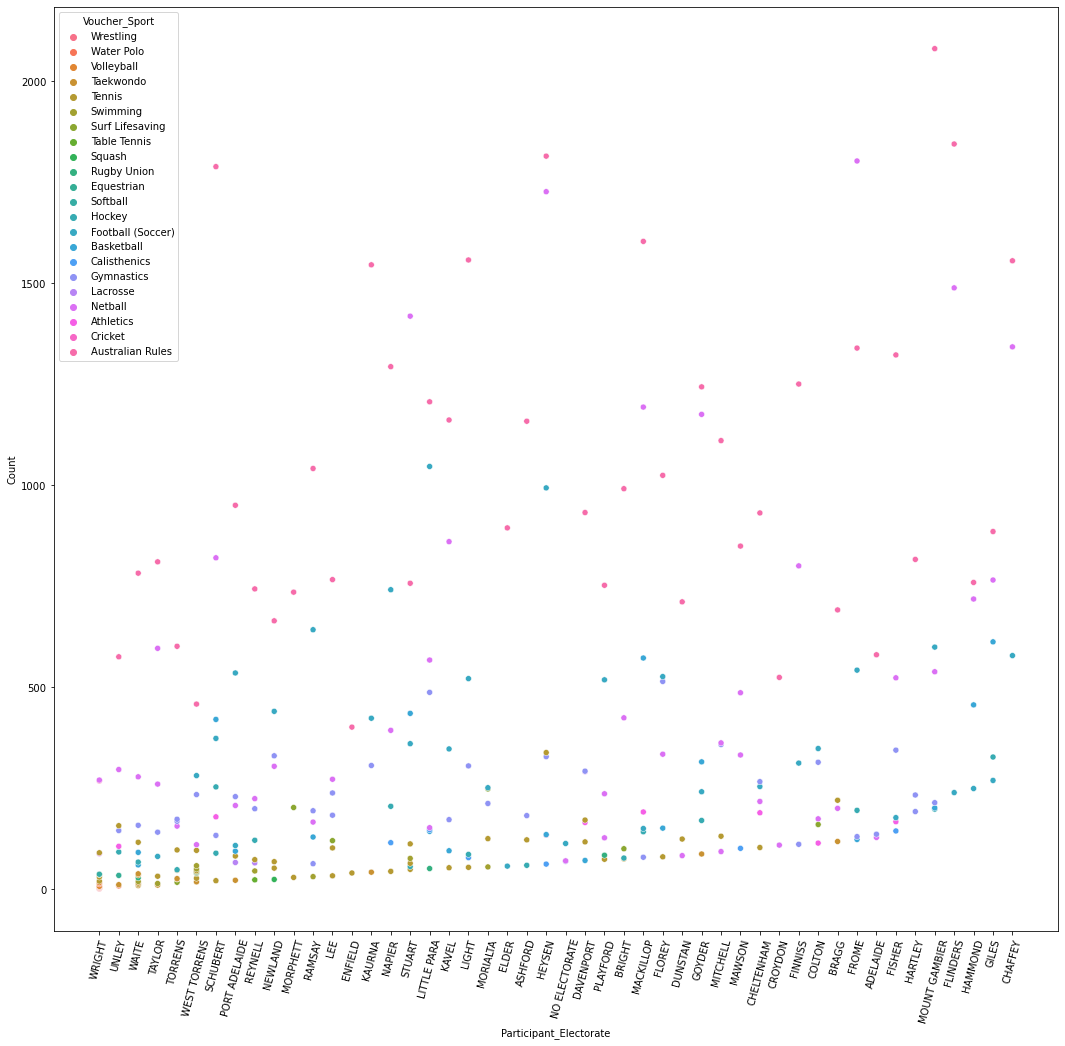

In [15]:
fig, ax = plt.subplots(figsize=(18, 17))
sns.scatterplot(x = 'Participant_Electorate', y = 'Count', data = group_count, hue = "Voucher_Sport")
ax.tick_params(axis='x', rotation=75)

# QUESTION 2 EVALUATION 

The scatter plot above indicates that sports such as **Taekwondo, Tennis, Swimming and Table Tennis** are overall the least popular. This is especially evident in electorates such as **Wright, Unley, Waite, Taylor, Torrens, West Torrens, Schubert, Port Adelaide, Reynell, Newland, Morephett, Ramsay**. 

We can see that the most popular sports are **Australian Rules and Netball** and while sports such as **Basketball** are relatively popular, electorates such as **Hammond, Giles and Chaffey** highlight that it's not very popular there. 

# QUESTION 3 

##  Are any electorates over/under represented in their use of vouchers?

In [16]:
group_electorate = group_elec.groupby(['Participant_Electorate'], as_index=False).max()          

In [17]:
group_count = group_electorate.groupby(['Count'], as_index=False).max()    

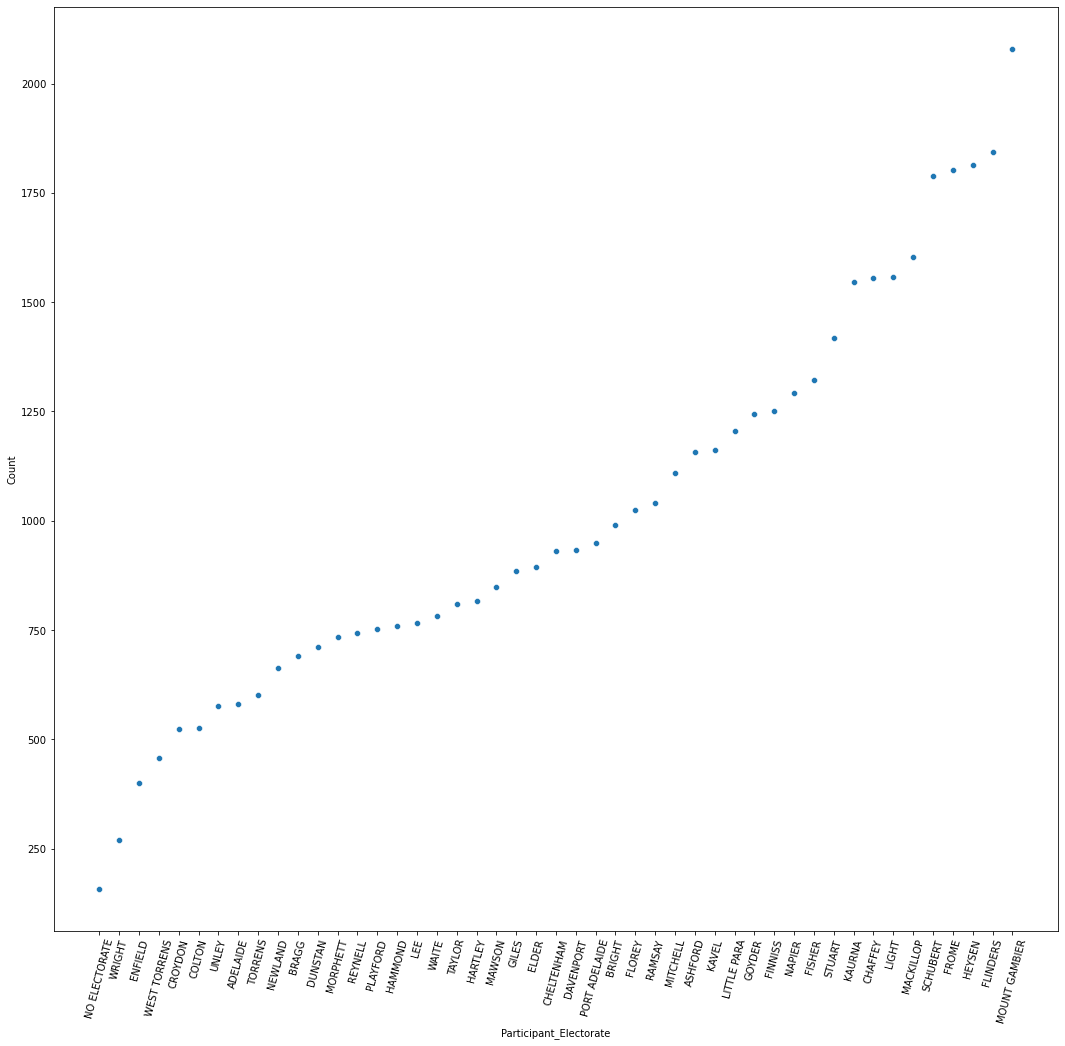

In [18]:
fig, ax = plt.subplots(figsize=(18, 17))
sns.scatterplot(x = 'Participant_Electorate', y = 'Count', data = group_count)
ax.tick_params(axis='x', rotation=75)

In [19]:
group_count.describe()

,Count
count,47.000000
mean,1012.085106
std,449.930808
min,158.000000
25%,723.000000
50%,931.000000
75%,1271.500000
max,2080.000000


# QUESTION 3 EVALUATION

The above graph highlights the spread of redeemed vouchers across the electorates. While the average amount of vouchers redeemed per electorate was 1012, electorates such as **Wright, Enfield, West Torrens and Croydon** are a standard deviation away from the mean. 

There are 9 electorates above the 3rd quartile, these include **KARUNA, CHAFFEY, LIGHT MACKILLOP, SCHUBERT, FROME, HENSEN, FLINDERS< MOUNT GAMBIER**

# QUESTION 4 

## Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [20]:
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [21]:
LGA_df = sa_vouchers.loc[:, ['Participant_LGA', 'Voucher_Sport']]
group_LGA = LGA_df.groupby(['Participant_LGA' , 'Voucher_Sport']).agg({'Voucher_Sport': ['count']})
group_LGA.columns = ['Count']
group_LGA = LGA_df.reset_index()

In [22]:
seifa_LGA = sa_vouchers_scores.drop(['Participant_ID', 'Participant_Suburb', 'Club_Previous_Member', 'Participant_ATSI_Indicator', 'Participant_CALD_Indicator', 'Participant_Sex', 'Club_Name', 'Participant_Electorate', 'Voucher_Completion_Date', 'Voucher_Claim_Year' ], axis=1)

In [23]:
seifa_LGA = seifa_LGA.groupby(['Participant_LGA']).first()
seifa_LGA = seifa_LGA.reset_index()

In [24]:
seifa_LGA = seifa_LGA.dropna()

In [25]:
seifa_LGA.describe()

,Voucher_Value,IEO,IER,IRSAD,IRSD,Population
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,47.983871,981.072581,981.072581,967.862903,979.911290,26003.475806
std,7.545473,44.548357,44.548357,56.503893,55.534919,36229.534770
min,10.000000,870.000000,870.000000,808.000000,798.000000,871.000000
25%,50.000000,960.250000,960.250000,931.000000,946.250000,3022.250000
50%,50.000000,981.500000,981.500000,969.500000,983.000000,10138.500000
75%,50.000000,1008.000000,1008.000000,994.375000,1014.500000,28668.000000
max,50.000000,1083.000000,1083.000000,1090.000000,1096.000000,159517.000000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [27]:
reg = linear_model.LinearRegression()
X = seifa_LGA[['IEO']]
y = seifa_LGA['Voucher_Value']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.00949192] + 38.67160481860773


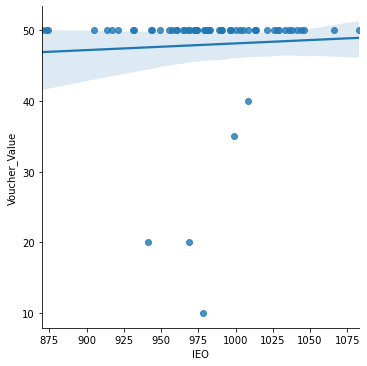

In [28]:
sns.lmplot(x = 'IEO', y = 'Voucher_Value', data = seifa_LGA)

# INTERPRETATION 

The above graph indicates that there is no distinct linear relationship between IEO and voucher value.

In [29]:
# IEO - A low score indicates relatively lower education and occupation status of people in the area in general.
# IER - A low score indicates a relative lack of access to economic resources in general. 
# IRSAD -  Index of Relative Socio-economic Advantage and Disadvantage (IRSAD) 
# POP - 

In [30]:
X = seifa_LGA[['Population']]
y = seifa_LGA['Voucher_Value']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [3.77795719e-05] + 47.0014707826399


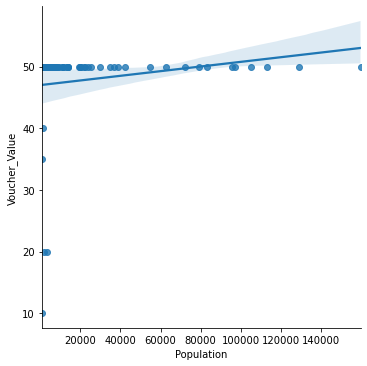

In [31]:
sns.lmplot(x = 'Population', y = 'Voucher_Value', data = seifa_LGA)

# INTERPRETATION 

The above graph indicates that there is no distinct linear relationship between population and voucher value. However, lower population may lead to lower voucher value in some cases.

In [32]:
seifa_LGA[['Population', 'Voucher_Value']].corr()

,Population,Voucher_Value
Population,1.000000,0.181398
Voucher_Value,0.181398,1.000000


In [33]:
seifa_LGA[['IEO', 'Voucher_Value']].corr()

,IEO,Voucher_Value
IEO,1.00000,0.05604
Voucher_Value,0.05604,1.00000


# QUESTION 4 EVALUATION

The linear regression models highlight that there is no relationship between SEIFA measures and voucher value. There is barely any correlation between population and voucher value as there is a correlation of 0.181398. Furthermore, there is an even lower correlation between IEO and voucher value as this returns a correlation of 0.05, which is essentially *no correlation*. 

# Evaluation

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [34]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [35]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-35-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


# Data Exploration

In [36]:
qld_LGA = qld_vouchers_scores.drop(columns = ['Application Number', 'Voucher Number', 'Child Age (at time of Application)' , 'Gender','Has your child played sport before?', 'Club Name' , 'Club Suburb/Town' , 'Club Local Government Area Name' , 'Parent Suburb/Town' , 'Total Payment' , 'LGA', 'IEO', 'IER' , 'IRSAD' , 'IRSD' , 'Population' ])

In [37]:
qld_LGA = qld_vouchers_scores.groupby(['Participation Activity']).agg({'Participation Activity': ['count']})
qld_LGA.columns = ['Count']
qld_LGA  = qld_LGA .reset_index()
qld_LGA.head()

,Participation Activity,Count
0,*Other,13
1,Archery,7
2,Athletics,97
3,Australian Football,548
4,BMX Bicycle Motocross,47


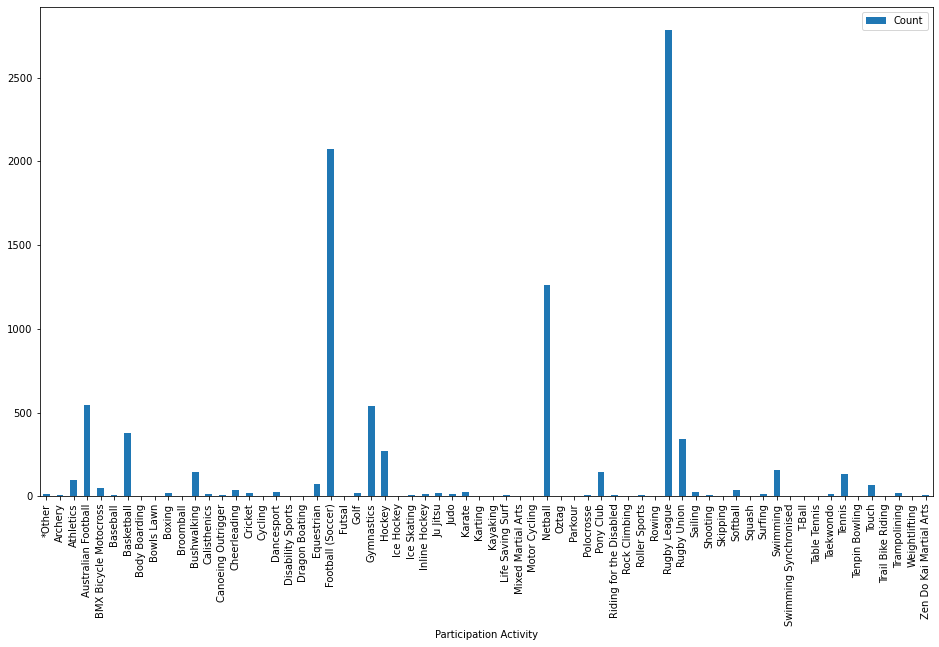

In [38]:
qld_LGA.plot(kind = 'bar', x = 'Participation Activity', y = 'Count', figsize = (16,9))
ax.tick_params(axis='x', rotation=75)

# Evaluation 

The graph above highlights how **Rugby League** is the most popular sport in Queensland, as opposed to South Australia's results which indicated *Australian Rules* was the most popular. Queensland's Australian Rules (Australian Football) only just surpassed the 500 count, highlight stark differences between the two states. 

# Mapping 

In [39]:
qld_vouchers_scores['Participation Activity'].unique()

array(['*Other', 'Archery', 'Athletics', 'Australian Football',
       'Baseball', 'Basketball', 'BMX Bicycle Motocross', 'Body Boarding',
       'Bowls Lawn', 'Boxing', 'Broomball', 'Bushwalking', 'Calisthenics',
       'Canoeing Outrigger', 'Cheerleading', 'Cricket', 'Cycling',
       'Dancesport', 'Disability Sports', 'Dragon Boating', 'Equestrian',
       'Football (Soccer)', 'Futsal', 'Golf', 'Gymnastics', 'Hockey',
       'Ice Hockey', 'Ice Skating', 'Inline Hockey', 'Ju Jitsu', 'Judo',
       'Karate', 'Karting', 'Kayaking', 'Life Saving Surf',
       'Mixed Martial Arts', 'Motor Cycling', 'Netball', 'Oztag',
       'Parkour', 'Polocrosse', 'Pony Club', 'Riding for the Disabled',
       'Rock Climbing', 'Roller Sports', 'Rowing', 'Rugby League',
       'Rugby Union', 'Sailing', 'Shooting', 'Skipping', 'Softball',
       'Squash', 'Surfing', 'Swimming', 'Swimming Synchronised',
       'Table Tennis', 'Taekwondo', 'T-Ball', 'Tennis', 'Tenpin Bowling',
       'Touch', 'Trail Bike R

In [40]:
sa_vouchers_scores['Voucher_Sport'].unique()

array(['Australian Rules', 'Gymnastics', 'Basketball', 'Netball', 'Golf',
       'Calisthenics', 'Cricket', 'Tennis', 'Surf Lifesaving', 'Fencing',
       'Football (Soccer)', 'Taekwondo', 'Table Tennis', 'Athletics',
       'Lacrosse', 'Rugby League', 'BMX', 'Hockey', 'Ju Jitsu',
       'Baseball', 'Diving', 'Softball', 'Swimming', 'Judo', 'Volleyball',
       'Rugby Union', 'Orienteering', 'Ice Skating', 'Cycling', 'Archery',
       'Dancesport', 'Equestrian', 'Motorcycling', 'Roller Sports',
       'Touch', 'Karate', 'Motor Sport', 'Squash', 'Water Polo',
       'Surf Riding', 'Weightlifting', 'Pony Clubs', 'Rowing',
       'Wrestling', 'Sailing', 'Badminton', 'Kung Fu (Wu Shu)',
       'Paralympics', 'Shooting', 'Bowls'], dtype=object)

In [41]:
qld_to_sa = { 'Australian Football' : 'Australian Rules', 'BMX Bicycle Motocross' : 'BMX', 
             'Body Boarding' : 'Surf Riding', 'Disability Sports' : 'Paralympics',
             'Life Saving Surf' : 'Surf Lifesaving' , 'Motor Cycling' : 'Motor Sport', 
             'Disabled Riding' : 'Paralympics'
}

In [42]:
qld_mapping = qld_vouchers_scores

In [43]:
qld_mapping['Participation Activity'] = sa_vouchers_scores['Voucher_Sport'].map(qld_to_sa)

In [44]:
qld_mapping.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,NaN,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,NaN,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,NaN,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,NaN,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,NaN,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


# Evaluation

Mapping was not successful as instead of mapping activity onto those of South Australia, it wiped out all the data for that column. Hence, a smaller exploration was conducted